<a href="https://colab.research.google.com/github/Juanchp00/Anal-tica-de-datos/blob/main/Anal%C3%ADtica_de_datos_Taller_1_airfoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1  
**Segunda Base de datos**

**Analítica de datos**

**Juan José Chamorro Paz**

#Base de datos **airfoil_self_noise**

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1BaHtJ8wcU6BiKsm9f3PIuLxj_TuIE--A"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O airfoil_self_noise.dat && rm -rf /tmp/cookies.txt

--2021-04-14 17:13:25--  https://docs.google.com/uc?export=download&confirm=&id=1BaHtJ8wcU6BiKsm9f3PIuLxj_TuIE--A
Resolving docs.google.com (docs.google.com)... 172.217.3.14, 2607:f8b0:4026:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.3.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5k-docs.googleusercontent.com/docs/securesc/qt8ofgl89b4traokiv8d24s3fad4ktj6/jg1rnvl4qgn8nal57khjhel83hpthal4/1618420350000/02220634972831643091/07920483908762406620Z/1BaHtJ8wcU6BiKsm9f3PIuLxj_TuIE--A?e=download [following]
--2021-04-14 17:13:25--  https://doc-0c-5k-docs.googleusercontent.com/docs/securesc/qt8ofgl89b4traokiv8d24s3fad4ktj6/jg1rnvl4qgn8nal57khjhel83hpthal4/1618420350000/02220634972831643091/07920483908762406620Z/1BaHtJ8wcU6BiKsm9f3PIuLxj_TuIE--A?e=download
Resolving doc-0c-5k-docs.googleusercontent.com (doc-0c-5k-docs.googleusercontent.com)... 172.217.3.1, 2607:f8b0:4026:800::2001
Connecting to doc-0c-5k-docs.g

In [ ]:
#Paso 1: Lectura
import pandas as pd #https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
dat_path = 'airfoil_self_noise.dat' #https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

Xdata = pd.read_csv(dat_path,header = None, delim_whitespace=True, error_bad_lines=False )
#Corroborar si el orden de los nombres si es el correcto.
Xdata.rename(columns = {0:'Frequency', 1:'Angle_of_attack', 2:'Chord_length', 3:'Free-stream_velocity', 4:'Suction_side_displacement_thickness', 5:'Scaled_sound_pressure_level'}, inplace = True)
Xdata.head()

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# magic function to render figure
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free-stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "Free-stream_velocity"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(1052,) (451,)


In [ ]:
ytest[:5]

array([39.6, 71.3, 31.7, 39.6, 39.6])

In [ ]:
ytrain[:5]

array([31.7, 71.3, 71.3, 39.6, 31.7])

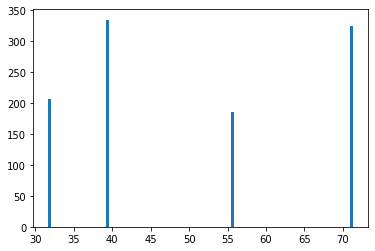

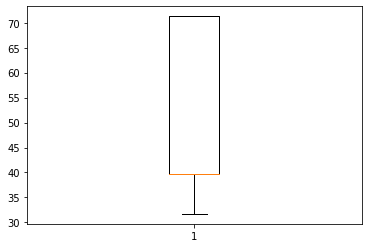

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.show()

In [ ]:
Xdata['Free-stream_velocity'].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: Free-stream_velocity, dtype: int64

##Matriz de correlación e histograma##

In [ ]:
corr_matrix = Xdata.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Frequency,Angle_of_attack,Chord_length,Free-stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction_side_displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Scaled_sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


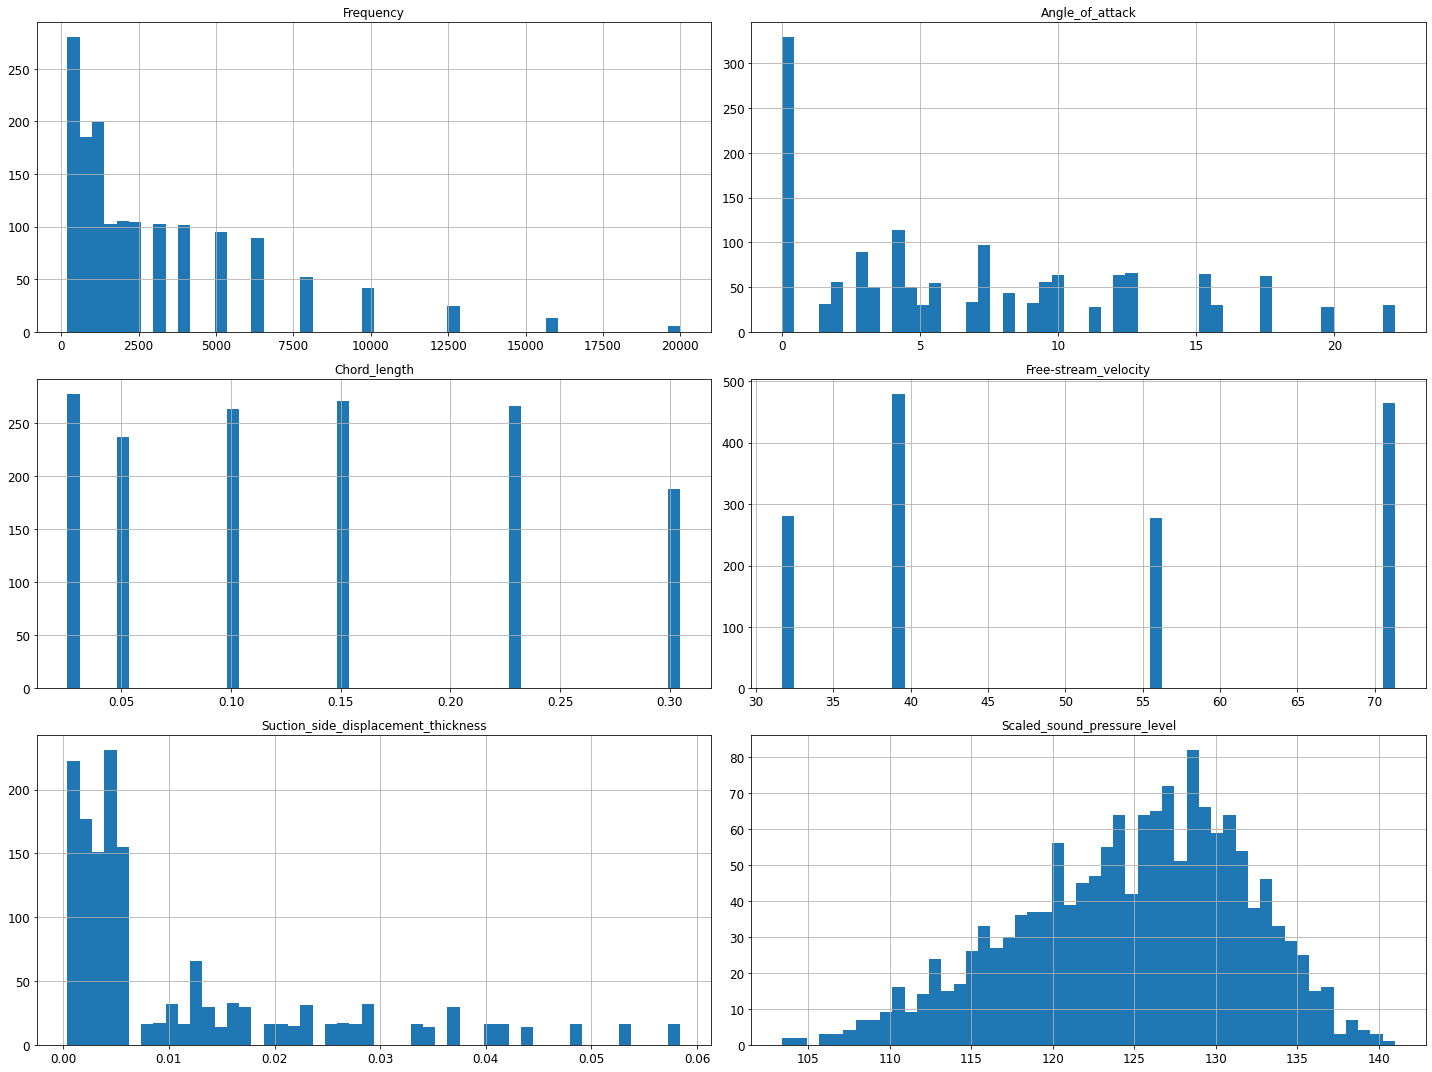

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Xdata.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.savefig('results/attribute_histogram_plots.pdf', format='pdf', dpi=300)
plt.show()

##Código de Regresión lineal##

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as msa



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.30)
print(X_train.shape); print(X_test.shape)

(736, 5)
(316, 5)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

14.570962752084451
0.1320403369464307
15.06301764455304
0.08194863470422309


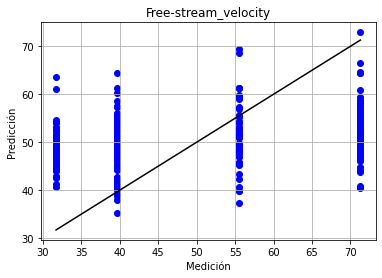

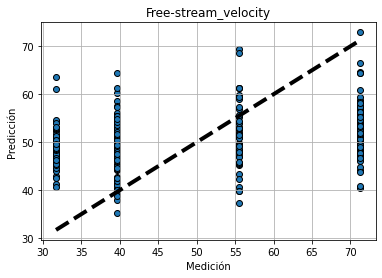

In [ ]:
#Gráficas de regresión con datos nuevos
plt.scatter(y_test, pred_test_lr, color ='b')
plt.plot(y_test, y_test, color ='k')
plt.xlabel('Medición')
plt.ylabel('Predicción')
plt.title('Free-stream_velocity')
plt.grid() 
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Medición')
ax.set_ylabel('Predicción')
ax.set_title('Free-stream_velocity')
plt.grid()
plt.show()

In [ ]:
print('MAE_test=', msa(y_test,pred_test_lr))

MAE_test= 13.538717647881283


##Código de Regresión lineal Ridge##

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

14.571388091485522
0.1319896631731422
15.05436233111444
0.08300336883350723


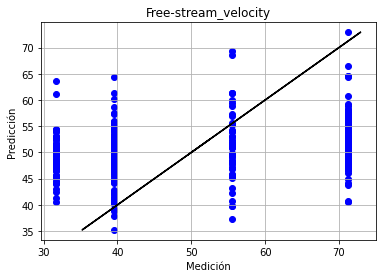

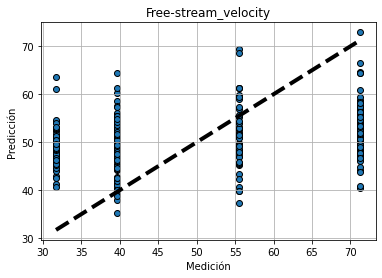

In [ ]:
#Gráficas de regresión con datos nuevos
plt.scatter(y_test, pred_test_lr, color ='b')
plt.plot(pred_test_lr, pred_test_lr, color ='k')
plt.xlabel('Medición')
plt.ylabel('Predicción')
plt.title('Free-stream_velocity')
plt.grid() 
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Medición')
ax.set_ylabel('Predicción')
ax.set_title('Free-stream_velocity')
plt.grid()
plt.show()

In [ ]:
print('MAE_test=', msa(y_test,pred_test_rr))

MAE_test= 13.533863621600423


##Código de Regresión lineal Lasso##

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

14.584095598055256
0.13047504333710458
15.024660494818692
0.08661821678433579


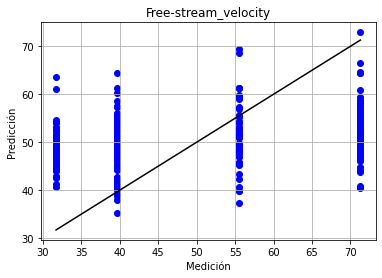

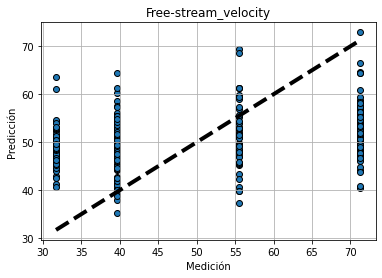

In [ ]:
#Gráficas de regresión con datos nuevos
plt.scatter(y_test, pred_test_lr, color ='b')
plt.plot(y_test, y_test, color ='k')
plt.xlabel('Medición')
plt.ylabel('Predicción')
plt.title('Free-stream_velocity')
plt.grid() 
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Medición')
ax.set_ylabel('Predicción')
ax.set_title('Free-stream_velocity')
plt.grid()
plt.show()

In [ ]:
print('MAE_test=', msa(y_test,pred_test_lasso))

MAE_test= 13.529758758030288


##Código de Regresión lineal ElasticNet##

In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

14.701538626957529
0.11641440868916009
15.07042327314386
0.0810457055730548


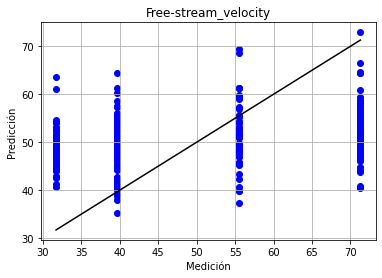

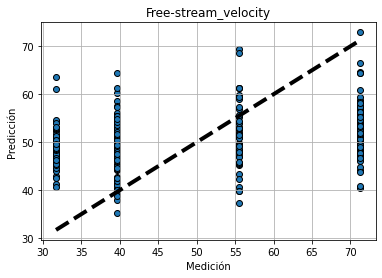

In [ ]:
#Gráficas de regresión con datos nuevos
plt.scatter(y_test, pred_test_lr, color ='b')
plt.plot(y_test, y_test, color ='k')
plt.xlabel('Medición')
plt.ylabel('Predicción')
plt.title('Free-stream_velocity')
plt.grid() 
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Medición')
ax.set_ylabel('Predicción')
ax.set_title('Free-stream_velocity')
plt.grid()
plt.show()

In [ ]:
print('MAE_test=', msa(y_test,pred_test_enet))

MAE_test= 13.6015997788231


##Código de Regresión KernelRidge##

In [ ]:
krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=3, coef0=1, kernel_params=None)
krr.fit(X_train,y_train)
pred_train_krr=krr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_krr)))
print(r2_score(y_train, pred_train_krr))

pred_test_krr=krr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_krr)))
print(r2_score(y_test, pred_test_krr))

14.17242909765742
0.17887054245416567
14.65480304579071
0.13103360146378062


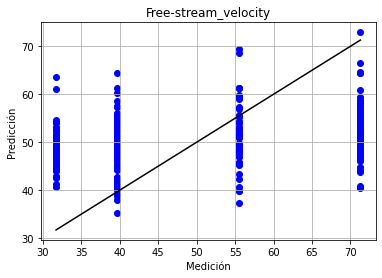

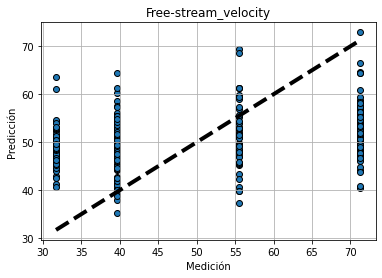

In [ ]:
#Gráficas de regresión con datos nuevos
plt.scatter(y_test, pred_test_lr, color ='b')
plt.plot(y_test, y_test, color ='k')
plt.xlabel('Medición')
plt.ylabel('Predicción')
plt.title('Free-stream_velocity')
plt.grid() 
plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, pred_test_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Medición')
ax.set_ylabel('Predicción')
ax.set_title('Free-stream_velocity')
plt.grid()
plt.show()

In [ ]:
print('MAE_test=', msa(y_test,pred_test_krr))

MAE_test= 12.840016226828853
